## Raw data / error analysis

In this notebook we show how to read the numpy record array that contains the raw data and the 
analysis of the predictability of each point. The raw data has been checked to ensure that there are no duplicate points (where duplicates were found due to re-occupation of sites, the moho values have been averaged) and therefore can be triangulated.

The "error" measures relate to the ability of a smooth surface to represent each data point. We ran multiple models with different smoothness and different numbers of nodes and, for each one, predict the value at each data point. This gives a spread of predictions point-by-point that give an indication of how well the best fitting surface fits in the region of that data point. 

Note that we use the `cartopy` mapping package (which depends upon `matplotlib`) to plot this information.

--- 

Notebooks in this section:

   - [A1-RawData-ConvertAndSave.ipynb](A1-RawData-ConvertAndSave.ipynb)
   - [A2-RawData-PlotQualityInformation.ipynb](A2-RawData-PlotQualityInformation.ipynb)
   - [A3-TriangulatingAndinterpolating.ipynb](A3-TriangulatingAndinterpolating.ipynb)
   - [A4-PlottingMohoAndMohoSlope.ipynb](A4-PlottingMohoAndMohoSlope.ipynb)
   - [A5-Interactive3DPlot.ipynb]([A5-Interactive3DPlot.ipynb)
   - [A6-ConvertModels2RegularXYZ.ipynb](A6-ConvertModels2RegularXYZ.ipynb)





In [1]:
%matplotlib inline

import numpy as np

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


In [2]:
## These are the original data 

import miller_alaskamoho_srl2018 as alaskamoho

In [3]:
mohoraw     = alaskamoho.MohoErr
mohoraw.dtype

dtype([('lon', '<f8'), ('lat', '<f8'), ('moh', '<f8'), ('xxx', '<f8'), ('stn', 'O'), ('min_err', '<f8'), ('mean_err', '<f8'), ('variance', '<f8'), ('q_score', '<f8')])

## RMS error 

This measure is the rms error for all the models evaluated at every point. The measures were computed by removing each point in turn from the data, then going through a fitting process for multiple random grids for each value of the model parameters. The predicted results were compared with the value removed from the dataset.

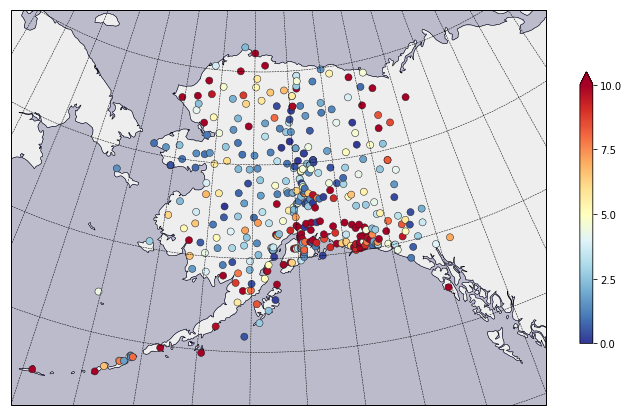

In [4]:
fig = plt.figure(figsize=(12, 10), facecolor="none")
ax1  = plt.subplot(111, projection=ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50, 
                                                       standard_parallels=(55,65) ))


ax1.set_extent([-175,-130,50,72])

# ax.set_global()

ax1.coastlines(resolution="50m",color="#000066", linewidth=0.5)


grat = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m",
                                           name="graticules_5")

ocean = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="ocean")

land = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="land")



ax1.coastlines(resolution="50m",color="#000000", linewidth=0.5, zorder=2)
ax1.add_feature(ocean, alpha=0.5, zorder=0, facecolor="#BBBBCC")
ax1.add_feature(land, alpha=1.0,  zorder=1, facecolor="#EEEEEE")

ax1.add_feature(grat, linewidth=0.5, 
                      linestyle="--",
                      edgecolor="#000000", 
                      facecolor="None", zorder=3)

m = ax1.scatter(mohoraw['lon'], mohoraw['lat'], c=np.abs(mohoraw['mean_err']), cmap=plt.cm.RdYlBu_r, 
                edgecolor="#222222", linewidth=0.5, vmin=0, vmax=10,
                marker="o", s=50.0, transform=ccrs.Geodetic(), zorder=3)

plt.colorbar(mappable=m, ax=ax1, shrink=0.5, extend='max', ticks=[0.0, 2.5, 5.0, 7.5, 10.0] )
pass

## Spread in model prediction

This measure indicates the spread of the different models around the mean of the prediction from all the models that were evaluated computed at each point. 

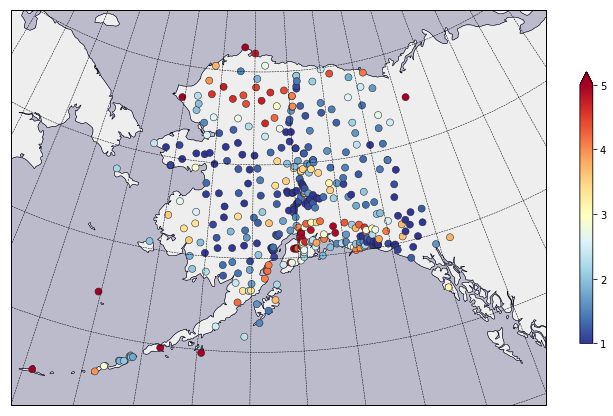

In [5]:
fig = plt.figure(figsize=(12, 10), facecolor="none")
ax1  = plt.subplot(111, projection=ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50, 
                                                       standard_parallels=(55,65) ))


ax1.set_extent([-175,-130,50,72])

# ax.set_global()

ax1.coastlines(resolution="50m",color="#000066", linewidth=0.5)


grat = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m",
                                           name="graticules_5")

ocean = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="ocean")

land = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="land")



ax1.coastlines(resolution="50m",color="#000000", linewidth=0.5, zorder=2)
ax1.add_feature(ocean, alpha=0.5, zorder=0, facecolor="#BBBBCC")
ax1.add_feature(land, alpha=1.0,  zorder=1, facecolor="#EEEEEE")

ax1.add_feature(grat, linewidth=0.5, 
                      linestyle="--",
                      edgecolor="#000000", 
                      facecolor="None", zorder=3)

m = ax1.scatter(mohoraw['lon'], mohoraw['lat'], c=mohoraw['variance'], cmap=plt.cm.RdYlBu_r, 
                edgecolor="#222222", linewidth=0.5, vmin=1.0, vmax=5.0,
                marker="o", s=50.0, transform=ccrs.Geodetic(), zorder=3)

plt.colorbar(mappable=m, ax=ax1, shrink=0.5, extend='max', ticks=[1.0, 2.0, 3.0, 4.0, 5.0] )
pass

## The quality score for each point

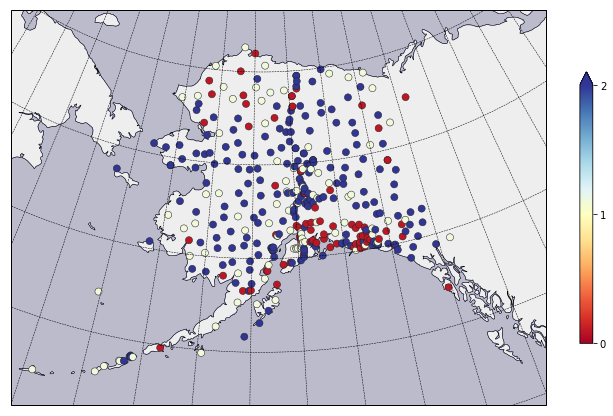

In [6]:
fig = plt.figure(figsize=(12, 10), facecolor="none")
ax1  = plt.subplot(111, projection=ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50, 
                                                       standard_parallels=(55,65) ))


ax1.set_extent([-175,-130,50,72])

# ax.set_global()

ax1.coastlines(resolution="50m",color="#000066", linewidth=0.5)


grat = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m",
                                           name="graticules_5")

ocean = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="ocean")

land = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="land")



ax1.coastlines(resolution="50m",color="#000000", linewidth=0.5, zorder=2)
ax1.add_feature(ocean, alpha=0.5, zorder=0, facecolor="#BBBBCC")
ax1.add_feature(land, alpha=1.0,  zorder=1, facecolor="#EEEEEE")

ax1.add_feature(grat, linewidth=0.5, 
                      linestyle="--",
                      edgecolor="#000000", 
                      facecolor="None", zorder=3)

m = ax1.scatter(mohoraw['lon'], mohoraw['lat'], c=mohoraw['q_score'], cmap=plt.cm.RdYlBu, 
                edgecolor="#222222", linewidth=0.5, vmin=0, vmax=2.0,
                marker="o", s=50.0, transform=ccrs.Geodetic(), zorder=3)

plt.colorbar(mappable=m, ax=ax1, shrink=0.5, extend='max', ticks=[0,1,2] )
pass


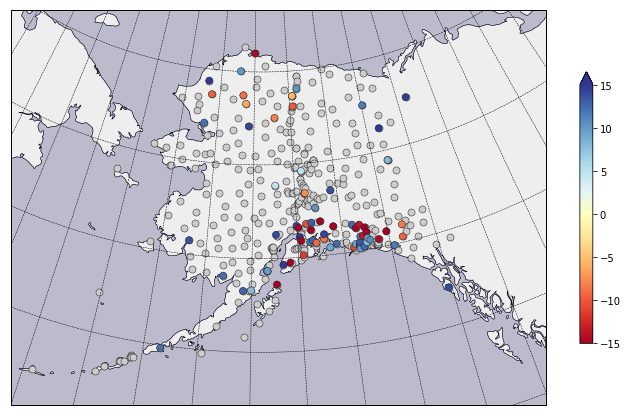

In [7]:
## For those models which score zero, which ones are on the plus side and which on the minus side ?


fig = plt.figure(figsize=(12, 10), facecolor="none")
ax1  = plt.subplot(111, projection=ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50, 
                                                       standard_parallels=(55,65) ))
ax1.set_extent([-175,-130,50,72])

# ax.set_global()

ax1.coastlines(resolution="50m",color="#000066", linewidth=0.5)


grat = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m",
                                           name="graticules_5")

ocean = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="ocean")

land = cartopy.feature.NaturalEarthFeature(category="physical", scale="50m", 
                                            name="land")


ax1.coastlines(resolution="50m",color="#000000", linewidth=0.5, zorder=2)
ax1.add_feature(ocean, alpha=0.5, zorder=0, facecolor="#BBBBCC")
ax1.add_feature(land, alpha=1.0,  zorder=1, facecolor="#EEEEEE")

outliers = np.where(mohoraw['q_score'] < 0.5)

ax1.add_feature(grat, linewidth=0.5, 
                      linestyle="--",
                      edgecolor="#000000", 
                      facecolor="None", zorder=3)

m = ax1.scatter(mohoraw['lon'], mohoraw['lat'], c="#CCCCCC", cmap=plt.cm.RdYlBu, 
                edgecolor="#222222", linewidth=0.5, vmin=0, vmax=2.0,
                marker="o", s=50.0, transform=ccrs.Geodetic(), zorder=3)

m = ax1.scatter(mohoraw['lon'][outliers], mohoraw['lat'][outliers], c=mohoraw["mean_err"][outliers], cmap=plt.cm.RdYlBu, 
                edgecolor="#222222", linewidth=0.5, vmin=-15, vmax=15,
                marker="o", s=50.0, transform=ccrs.Geodetic(), zorder=4)


plt.colorbar(mappable=m, ax=ax1, shrink=0.5, extend='max', ticks=[-15,-10,-5, 0 ,5 , 10, 15] )
pass

